In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# **Домашнее задание к уроку 7**

### Задание 1 и 2

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [2]:
# Загрузка датасета
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [3]:
# Разбиение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

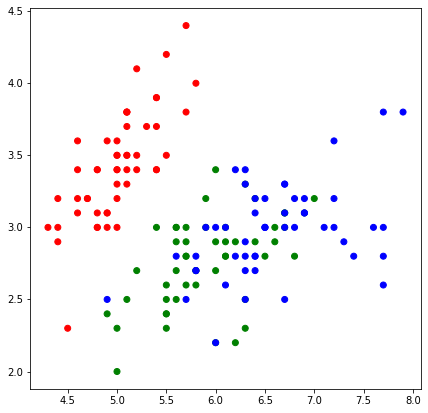

In [4]:
# Визуализация датасета
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [9]:
# Класс для метода ближайших соседей
# weights_type = 'n' - веса в зависимости от номера соседа
# weights_type = 'd' - веса в зависимости от расстояния до соседа

class KNN:
    
    def __init__(self, k=3, weights=False, weights_type='n', q=0.5):
        self.k = k
        self.weights = weights
        self.weights_type = weights_type
        self.q = q
        self.X = None
        self.y = None

 # Функция для расчёта расстояния   
    def e_metrics(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance += np.square(x1[i] - x2[i])
        return np.sqrt(distance)
    
    def get_classes(self, test_distances):
        classes = {class_item: 0 for class_item in set(self.y)}
        neightbours = sorted(test_distances)[0:self.k]
        
        if self.weights:
            if self.weights_type == 'n':
                for idx in range(len(neightbours)):
                    classes[neightbours[idx][1]] += self.q**idx 
         
            elif self.weights_type == 'd':
                for itm in neightbours:
                    classes[itm[1]] += self.q**itm[0] 
        else:
            for itm in neightbours:
                classes[itm[1]] += 1 
        
        return classes
    def fit(self, X, y):
        self.X, self.y = X, y
    
    def predict(self, x_test):
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(self.X)):

                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x, self.X[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, self.y[i]))
            
            classes = self.get_classes(test_distances)


            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(sorted(classes, key=classes.get)[-1])
        return answers

In [10]:
# Функция для расчёта точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [13]:
# Функция для визуализации результатов
def get_graph(X_train, y_train, k, weights_type, q, weights=True):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = 0.02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    knn = KNN(k=k, weights_type=weights_type, q=q, weights=weights)
    knn.fit(X_train, y_train)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

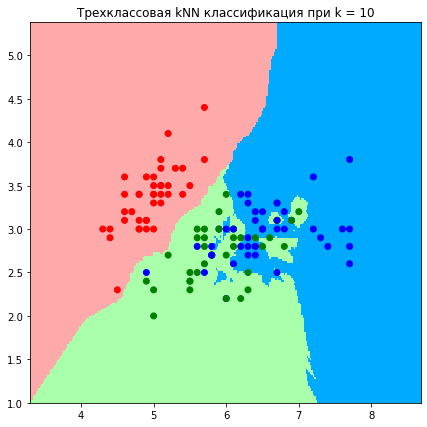

In [15]:
# Результаты работы KNN с весами в зависимости от номера соседа
get_graph(X_train, y_train, 10, 'n', 0.7)

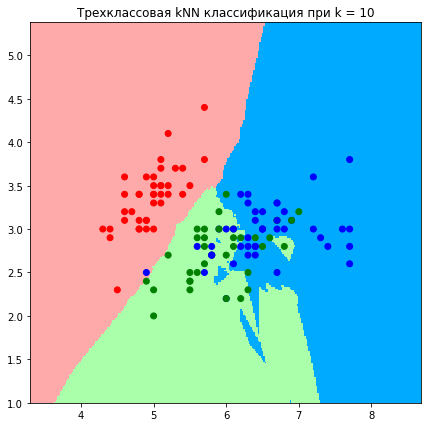

In [16]:
# Результаты работы KNN с весами в зависимости от расстояния до соседа
get_graph(X_train, y_train, 10, 'd', 0.7)

### Задание 3

Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

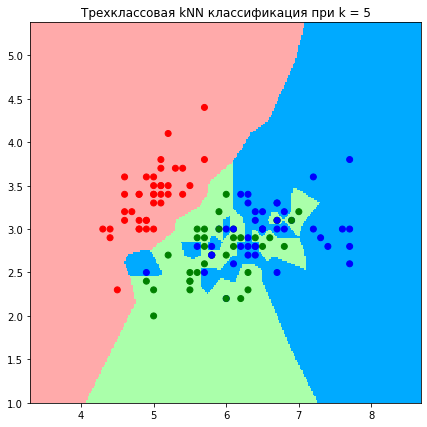

In [17]:
get_graph(X_train, y_train, 5, 'n', 0.1)

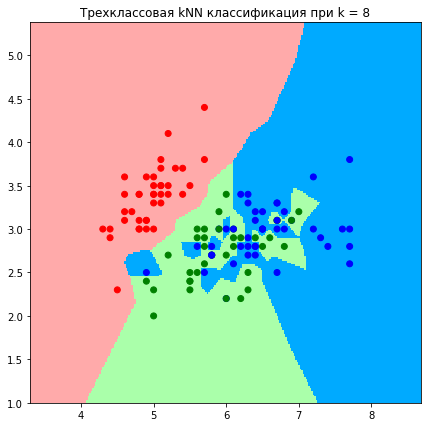

In [18]:
get_graph(X_train, y_train, 8, 'n', 0.1)

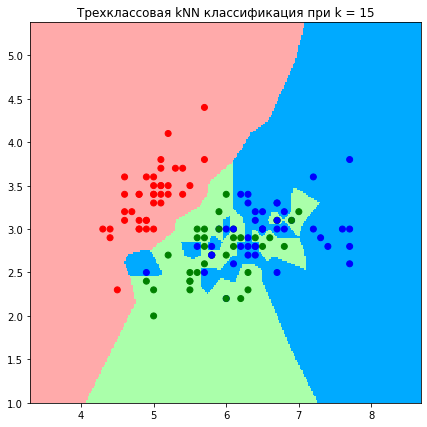

In [19]:
get_graph(X_train, y_train, 15, 'n', 0.1)

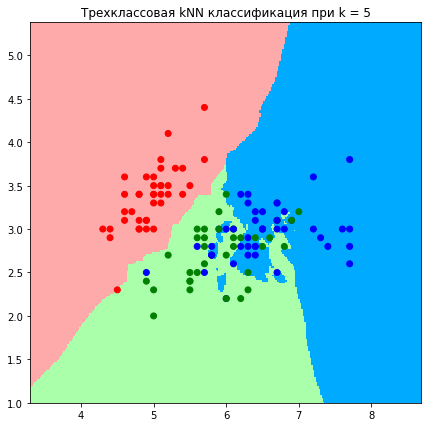

In [20]:
get_graph(X_train, y_train, 5, 'd', 0.1)

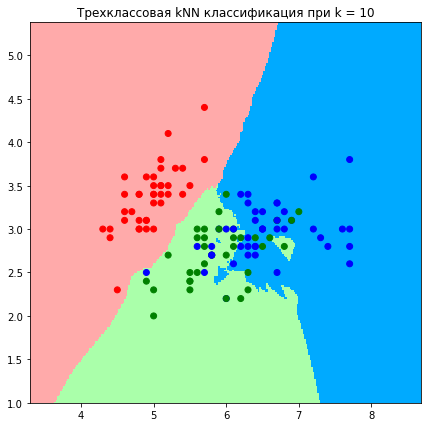

In [21]:
get_graph(X_train, y_train, 10, 'd', 0.1)